In [1]:
import numpy as np
import pandas as pd
# import mysql.connector
import matplotlib.pyplot as plt
import urllib.request
import json
# import requests
from math import acos, cos, sin, degrees, atan
from IPython.core.debugger import set_trace
from random import randint
import functions

In [2]:
# f = requests.get('https://people.sc.fsu.edu/~jburkardt/datasets/tsp/att48_xy.txt')
# ff = f.text

In [3]:
jsonResult = urllib.request.urlopen('https://people.sc.fsu.edu/~jburkardt/datasets/tsp/att48_xy.txt').read().decode("utf-8")

In [4]:
df = pd.DataFrame(columns = ['id', 'Latitude', 'Longitude'], index = range(len(jsonResult.split("\n"))-1))
for i in range(len(jsonResult.split("\n"))-1):
    if len(jsonResult.split("\n")[i].split(' ')) > 2:
        k = 0
        a = []
        for j in jsonResult.split("\n")[i].split(' '):
            if len(j) > 0:
                a.append(j)
                k+=1
                if k == 2:
                    df['Latitude'][i] = a[0]
                    df['Longitude'][i] = a[1]
                    df['id'][i] = i+1
    else:
        df['Latitude'][i] = jsonResult.split("\n")[i].split(' ')[0]
        df['Longitude'][i] = jsonResult.split("\n")[i].split(' ')[1]
        df['id'][i] = i+1

In [5]:
depotIndex = int(input(f'Choose one number between {0} and {len(df) - 1} to make a depot: '))

Choose one number between 0 and 47 to make a depot: 38


In [6]:
depotLat = int(df['Latitude'][depotIndex])
depotLon = int(df['Longitude'][depotIndex])
depo = [depotLat, depotLon]
depo

[3484, 2829]

In [7]:
df['Latitude'], df['Longitude'], df['id'] = df['Latitude'].astype(int), df['Longitude'].astype(int), df['id'].astype(int)

In [8]:
indf = list(df.index)

reind = indf[:]
reind[0], reind[depotIndex] = reind[depotIndex], reind[0]

df = df.reindex(reind)
df.index = range(len(df))

df['id'][0] = 1
df['id'][depotIndex] = depotIndex + 1

In [9]:
dist = np.zeros((len(df), len(df)))
for i in range(len(df)):
    for j in range(len(df)):
        dist[i][j] = np.sqrt((df['Latitude'][j] - df['Latitude'][i])**2 + (df['Longitude'][j] - df['Longitude'][i])**2)
dist

array([[   0.        , 3084.11445961, 2481.9631343 , ..., 3327.04448422,
        1754.26394821,  999.64493697],
       [3084.11445961,    0.        , 3587.42316991, ..., 5460.74765943,
        4389.05547926, 2087.27669464],
       [2481.9631343 , 3587.42316991,    0.        , ..., 2022.99036083,
        1866.16746301, 2559.95566368],
       ...,
       [3327.04448422, 5460.74765943, 2022.99036083, ...,    0.        ,
        1643.50509582, 3927.24547234],
       [1754.26394821, 4389.05547926, 1866.16746301, ..., 1643.50509582,
           0.        , 2531.02745935],
       [ 999.64493697, 2087.27669464, 2559.95566368, ..., 3927.24547234,
        2531.02745935,    0.        ]])

In [10]:
df = df[1:]

In [11]:
# avgPoint = [df['Latitude'].mean(), df['Longitude'].mean()]
# avgPoint

In [12]:
avgPoint = [(df['Latitude'].max() - df['Latitude'].min())/2, (df['Longitude'].max() - df['Longitude'].min())/2]
avgPoint

[3876.0, 2587.0]

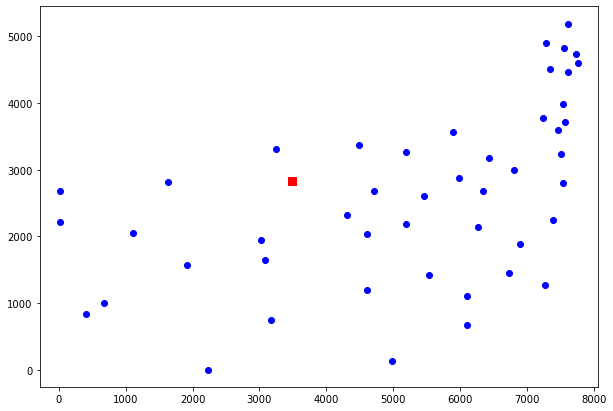

In [13]:
functions.scatterplotAllPoints(df, depo, avgPoint)

In [14]:
twoparts = functions.collectingTwoParts(df, avgPoint, depo)
part1 = twoparts[0]
part2 = twoparts[1]

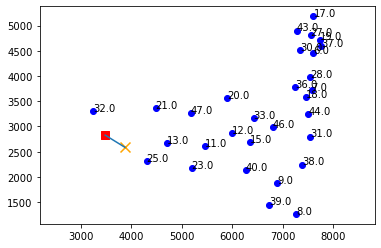

In [15]:
functions.plotLeftOrRightPoints(part1, avgPoint, depo)

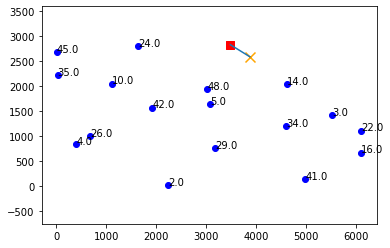

In [16]:
functions.plotLeftOrRightPoints(part2, avgPoint, depo)

In [17]:
part1['proj'] = part1['cosPhi'] * part1['b']
part2['proj'] = part2['cosPhi'] * part2['b']

In [18]:
part1['coef2'] = part1['proj'] * part1['cosPhi']
part2['coef2'] = part2['proj'] * part2['cosPhi']

In [19]:
for i in range(len(part1)):
    part1['angle'][i] = degrees(acos(part1['cosPhi'][i]))
for i in range(len(part2)):
    part2['angle'][i] = degrees(acos(part2['cosPhi'][i]))

In [20]:
bootResult1 = functions.dataframeForPointsWithBootAngles(part1, part2)
part1 = bootResult1[0]
boot1 = bootResult1[1]
boot1.index = range(len(boot1))


bootResult2 = functions.dataframeForPointsWithBootAngles(part2, part2)
part2 = bootResult2[0]
boot2 = bootResult2[1]
boot2.index = range(len(boot2))
boot = pd.concat([boot1, boot2], ignore_index=True)
boot

,id,belonging,Latitude,Longitude,proj,cosPhi,a,b,c,angle,coef2
0,32.0,part1,3245.0,3305.0,-453.414619,-0.851272,460.682103,532.632143,955.868715,148.350246,385.978989
1,4.0,part2,401.0,841.0,-1579.049838,-0.430448,460.682103,3668.382886,3888.976858,115.496025,679.699603
2,10.0,part2,1112.0,2049.0,-1608.623377,-0.644234,460.682103,2496.954946,2815.872866,130.108271,1036.329939
3,24.0,part2,1633.0,2809.0,-1564.532235,-0.845187,460.682103,1851.108047,2253.959405,147.691964,1322.322118
4,26.0,part2,675.0,1006.0,-1432.575730,-0.427800,460.682103,3348.702734,3570.148736,115.328037,612.856197
5,35.0,part2,23.0,2216.0,-2622.993149,-0.746257,460.682103,3514.866996,3870.820326,138.267156,1957.426289
6,45.0,part2,10.0,2676.0,-2875.696693,-0.826975,460.682103,3477.367539,3867.024308,145.789260,2378.129829


___

# !!!

In [21]:
data1 = part1[['id', 'angle', 'coef2', 'b']]
data2 = part2[['id', 'angle', 'coef2', 'b']]

In [22]:
resultat1 = functions.ggg(data1, dist)[0]
# tek1 = functions.ggg(data1, dist)[1]
resultat2 = functions.ggg(data2, dist)[0]
# tek2 = functions.ggg(data2, dist)[1]
print(resultat1)
print(resultat2)

[21.0, 47.0, 20.0, 36.0, 18.0, 7.0, 30.0, 28.0, 43.0, 6.0, 27.0, 37.0, 19.0, 17.0, 44, 31.0, 46.0, 33.0, 15.0, 12.0, 13.0, 11.0, 38.0, 9.0, 40.0, 39, 8.0, 23.0, 25]
[48.0, 5.0, 42.0, 29.0, 2.0, 34, 41.0, 16, 22, 3, 14.0]


____

____

In [23]:
if list(boot['belonging']).count('part1') == 1:
    resultat1.insert(0, boot['id'][list(boot['belonging']).index('part1')])
elif list(boot['belonging']).count('part1') > 1:
    boot_1 = boot[boot['belonging'] == 'part1']
    boot_1.index = range(len(boot_1))
    boot1res = functions.ggg(boot_1, dist)[0]
    print(boot1res)
    resultat1 = boot1res[::-1] + resultat1

if list(boot['belonging']).count('part2') == 1:
    resultat2.insert(0, boot['id'][list(boot['belonging']).index('part2')])                     
elif list(boot['belonging']).count('part2') > 1:
    boot_2 = boot[boot['belonging'] == 'part2']
    boot_2.index = range(len(boot_2))
    boot2res = functions.ggg(boot_2, dist)[0]
    print(boot2res)
    resultat2 = boot2res[::-1] + resultat2

[26.0, 4.0, 35.0, 45.0, 10.0, 24.0]


In [24]:
print(resultat1)
print(resultat2)

[32.0, 21.0, 47.0, 20.0, 36.0, 18.0, 7.0, 30.0, 28.0, 43.0, 6.0, 27.0, 37.0, 19.0, 17.0, 44, 31.0, 46.0, 33.0, 15.0, 12.0, 13.0, 11.0, 38.0, 9.0, 40.0, 39, 8.0, 23.0, 25]
[24.0, 10.0, 45.0, 35.0, 4.0, 26.0, 48.0, 5.0, 42.0, 29.0, 2.0, 34, 41.0, 16, 22, 3, 14.0]


In [25]:
len(resultat1) + len(resultat2), len(df)

(47, 47)

In [26]:
totalList = [int(i) for i in resultat1 + resultat2[::-1]]
totalList.insert(0, 1)
totalList.insert(len(totalList), 1)
print(totalList)

[1, 32, 21, 47, 20, 36, 18, 7, 30, 28, 43, 6, 27, 37, 19, 17, 44, 31, 46, 33, 15, 12, 13, 11, 38, 9, 40, 39, 8, 23, 25, 14, 3, 22, 16, 41, 34, 2, 29, 42, 5, 48, 26, 4, 35, 45, 10, 24, 1]


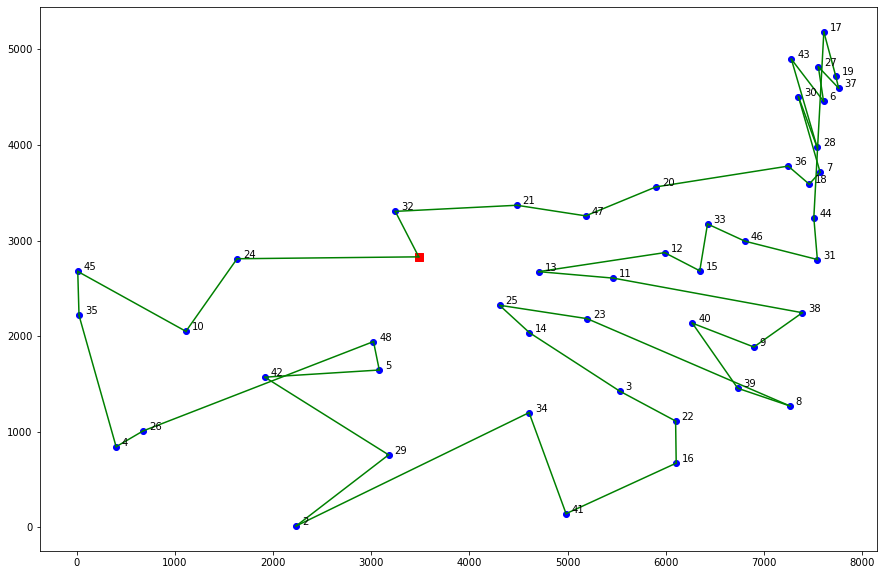

In [27]:
functions.getPlot(totalList, df, depo, avgPoint)

In [28]:
functions.calculateDistanceForGivenList(totalList, dist)

44150.257423730865

___

____

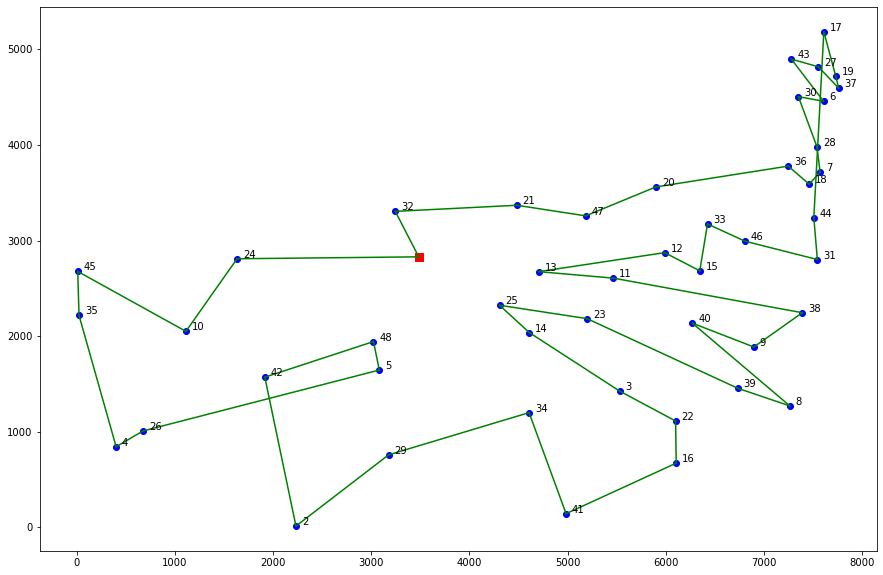

In [29]:
functions.getPlot(functions.swapTwoPoints(totalList, dist)[0], df, depo, avgPoint)

In [30]:
a = functions.swapTwoPoints(totalList, dist)[0]
functions.swapTwoPoints(totalList, dist)[1]

41654.165128795845

In [31]:
a.remove(a[0])
a.remove(a[len(a)-1])

In [32]:
res = functions.distFromDepot(a, dist)

In [33]:
# res

In [34]:
key_list = list(res.keys())
val_list = list(res.values())

In [35]:
resultatRemained = functions.removingOutliers(val_list)[0]
resultatRemoved = functions.removingOutliers(val_list)[1]
len(a), len(resultatRemained) + len(resultatRemoved)

(47, 47)

In [36]:
remained = []
removed = []
for i in resultatRemained:
    remained.append(key_list[val_list.index(i)])
for i in resultatRemoved:
    removed.append(key_list[val_list.index(i)])

In [37]:
len(remained) + len(removed)

47

In [38]:
b = remained[:]
b.insert(0, 1)
b.insert(len(b), 1)
print(b)

[1, 32, 21, 47, 20, 36, 18, 7, 28, 30, 6, 43, 27, 37, 19, 17, 44, 31, 46, 38, 9, 8, 39, 22, 16, 41, 2, 26, 4, 35, 45, 10, 24, 1]


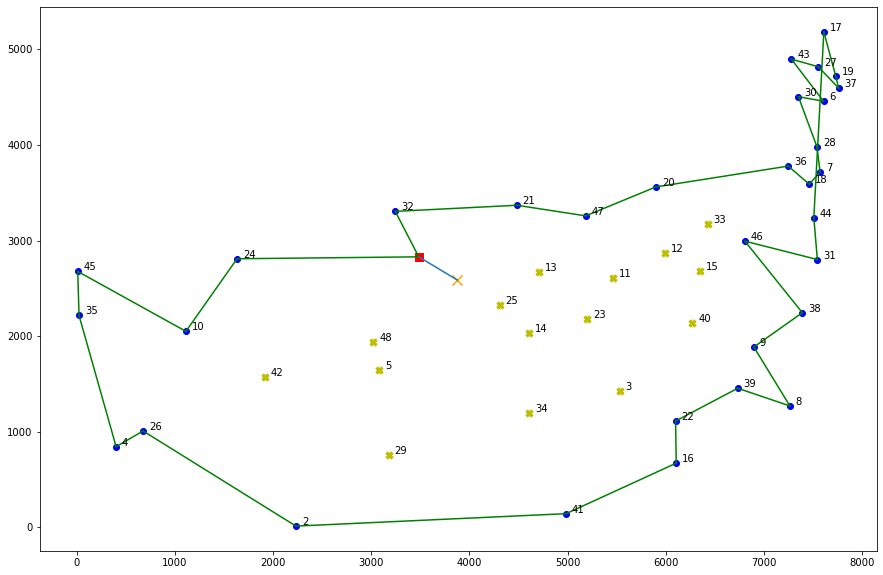

In [39]:
functions.getPlotWithRemovedPoints(b, df, depo, avgPoint, removed)

In [40]:
print(remained)
print(removed)

[32, 21, 47, 20, 36, 18, 7, 28, 30, 6, 43, 27, 37, 19, 17, 44, 31, 46, 38, 9, 8, 39, 22, 16, 41, 2, 26, 4, 35, 45, 10, 24]
[13, 11, 12, 15, 33, 40, 25, 14, 23, 3, 34, 29, 48, 5, 42]


In [41]:
added = functions.addingRemovedPointsToRoute(removed, remained, dist)
added.insert(0, 1)
added.insert(len(added), 1)
print(added)
print('*'*124)
print(len(added))
print('*'*124)
addedDist = functions.calculateDistanceForGivenList(added, dist)
print(addedDist)

[1, 32, 21, 25, 48, 5, 34, 14, 13, 23, 11, 40, 15, 33, 12, 47, 20, 36, 18, 7, 28, 30, 6, 43, 27, 37, 19, 17, 44, 31, 46, 38, 9, 8, 39, 3, 22, 16, 41, 29, 2, 26, 4, 35, 45, 10, 42, 24, 1]
****************************************************************************************************************************
49
****************************************************************************************************************************
39604.28639129586


In [42]:
# def addingReverselyRemovedPointsToRoute(removedList, remainedList, dist):
#     import functions
#     remained_ = remainedList[:]
#     for i in removedList[::-1]:
#         u = {}
#         b = remained_[:]
#         d = remained_[:]
#         for j in remained_:
#             u[j] = dist[i - 1][j - 1]
            
#         close = list(dict(sorted(u.items(), key = lambda x: x[1])).keys())[0]
#         findIndexOfClose = remained_.index(close)
        
#         b.insert(findIndexOfClose, i)
#         firstVariantDist = functions.calculateDistanceForGivenList(b, dist)
        
#         d.insert(findIndexOfClose + 1, i)
#         secondVariantDist = functions.calculateDistanceForGivenList(d, dist)
        
#         if firstVariantDist < secondVariantDist:
#             remained_.insert(findIndexOfClose, i)
#         else:
#             remained_.insert(findIndexOfClose + 1, i)
#     return remained_

In [43]:
addedReverse = functions.addingReverselyRemovedPointsToRoute(removed, remained, dist)
addedReverse.insert(0, 1)
addedReverse.insert(len(addedReverse), 1)
print(addedReverse)
print('*'*124)
print(len(addedReverse))
print('*'*124)
addedReverseDist = functions.calculateDistanceForGivenList(addedReverse, dist)
print(addedReverseDist)

[1, 32, 21, 47, 20, 33, 36, 18, 7, 28, 30, 6, 43, 27, 37, 19, 17, 44, 31, 46, 38, 9, 8, 39, 40, 15, 12, 11, 23, 13, 25, 14, 3, 22, 16, 41, 34, 2, 26, 4, 35, 45, 10, 24, 42, 48, 5, 29, 1]
****************************************************************************************************************************
49
****************************************************************************************************************************
37922.67931749434


In [44]:
if addedDist <= addedReverseDist:
    currentResult = added
else:
    currentResult = addedReverse
    
print(currentResult)
functions.calculateDistanceForGivenList(currentResult, dist)

[1, 32, 21, 47, 20, 33, 36, 18, 7, 28, 30, 6, 43, 27, 37, 19, 17, 44, 31, 46, 38, 9, 8, 39, 40, 15, 12, 11, 23, 13, 25, 14, 3, 22, 16, 41, 34, 2, 26, 4, 35, 45, 10, 24, 42, 48, 5, 29, 1]


37922.67931749434

In [45]:
# functions.getPlot(currentResult, df, depo, avgPoint)

In [46]:
currentswapped = functions.swapTwoPoints(currentResult, dist)[0]
functions.swapTwoPoints(currentResult, dist)[1]

37627.941702812546

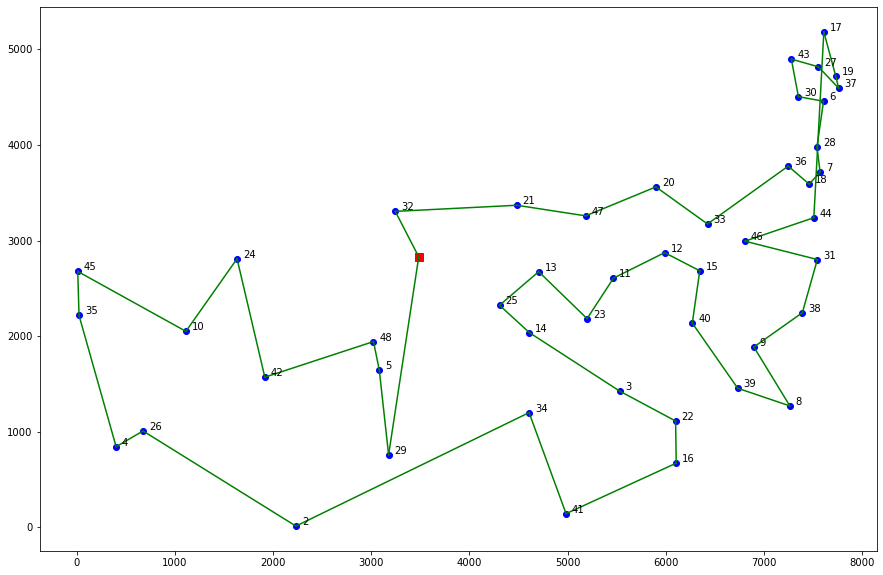

In [47]:
functions.getPlot(currentswapped, df, depo, avgPoint)

### hope for 15.02.22

In [48]:
swappedWhole = functions.swapping(currentswapped, dist)
functions.calculateDistanceForGivenList(swappedWhole, dist)

36864.189178555185

In [49]:
# functions.getPlot(swapping(currentswapped), df, depo, avgPoint)

In [50]:
swappedWholeSwapTwo = functions.swapTwoPoints(swappedWhole, dist)
swappedWholeSwapTwo[1]

36864.189178555185

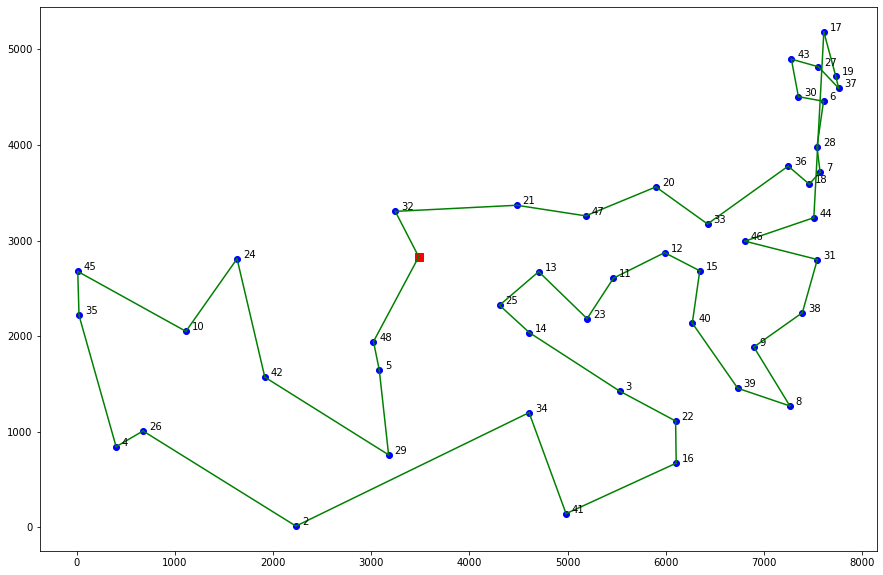

In [51]:
functions.getPlot(swappedWholeSwapTwo[0], df, depo, avgPoint)

In [52]:
def randomSwap(listname, dist):
    import functions
#     h=0
    best = listname[:]
    distBest = functions.calculateDistanceForGivenList(best, dist)
#     distCurrent = calculateDistanceForGivenList(best)
    for i in range(200000):
        rand1 = randint(1, len(listname) - 2)
        rand2 = randint(1, len(listname) - 2)
        if rand1 != rand2:
            current = best[:]
            current[rand1], current[rand2] = current[rand2], current[rand1]
            distCurrent = functions.calculateDistanceForGivenList(current, dist)
            if distCurrent <= distBest: #) or (h<1000 and (distCurrent-distBest)/distBest * 100 < 2)):
#                 h += 1
                best = current
                distBest = distCurrent
            else:
                continue
    return best

In [53]:
end = randomSwap(swappedWholeSwapTwo[0], dist)

In [54]:
functions.calculateDistanceForGivenList(end, dist)

35068.78211051736

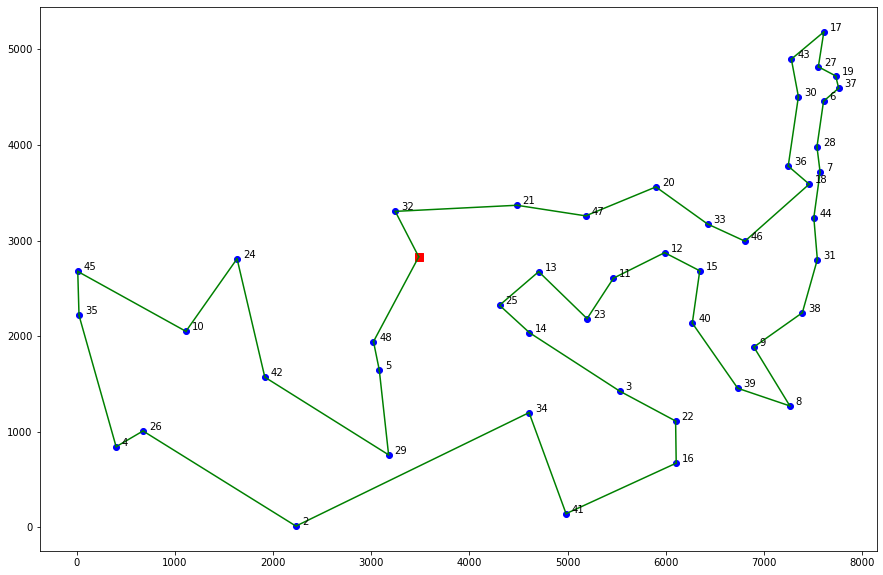

In [55]:
functions.getPlot(end, df, depo, avgPoint)